In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("poster")
%matplotlib inline

In [2]:
data_dir = "/Users/maxverbiest/PhD/projects/genotype_strs/data/fotsing_data/"
df = pd.read_csv(data_dir + "fotsing_etal_data_sheet_hg38_tral_panel.tsv", header = None, sep="\t")
df['tmp_id'] = df.apply(lambda row: f"{row[12]}_{row[13]}", axis = 1)
df.drop([12, 13, 14, 15, 17, 18], axis=1, inplace=True)
df.columns = [
  "chr",
  "start",
  "end",
  "gene_id",
  "gene_name",
  "tissue_hits",
  "beta_max",
  "tissue_info",
  "pval",
  "CAVIAR_score",
  "unit_fw",
  "unit_rv",
  "unit_panel",
  "panel_overlap",
  "tmp_id"
]

In [3]:
df.to_csv(f"{data_dir}fotsing_etal_tmp_id_mapping.tsv", sep="\t", index=False)

In [4]:
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22393 entries, 0 to 22392
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   chr            22393 non-null  object 
 1   start          22393 non-null  int64  
 2   end            22393 non-null  int64  
 3   gene_id        22393 non-null  object 
 4   gene_name      22393 non-null  object 
 5   tissue_hits    22393 non-null  int64  
 6   beta_max       22393 non-null  float64
 7   tissue_info    22393 non-null  object 
 8   pval           22393 non-null  float64
 9   CAVIAR_score   22347 non-null  float64
 10  unit_fw        22393 non-null  object 
 11  unit_rv        22393 non-null  object 
 12  unit_panel     22393 non-null  object 
 13  panel_overlap  22393 non-null  int64  
 14  tmp_id         22393 non-null  object 
dtypes: float64(3), int64(4), object(8)
memory usage: 2.6+ MB
None


,start,end,tissue_hits,beta_max,pval,CAVIAR_score,panel_overlap
count,2.239300e+04,2.239300e+04,22393.000000,22393.000000,2.239300e+04,2.234700e+04,22393.000000
mean,7.453439e+07,7.453442e+07,1.981155,0.004186,3.152115e-04,7.148528e-02,19.111017
std,5.566473e+07,5.566473e+07,2.146705,0.319096,6.417859e-04,1.365815e-01,10.788728
min,4.949300e+04,4.950400e+04,1.000000,-0.842330,1.020000e-69,7.950000e-16,1.000000
25%,3.262554e+07,3.262557e+07,1.000000,-0.271403,2.630000e-07,9.636540e-03,11.000000
50%,6.058528e+07,6.058533e+07,1.000000,0.180656,4.800000e-05,2.422930e-02,15.000000
75%,1.095858e+08,1.095858e+08,2.000000,0.273124,3.961950e-04,6.501635e-02,24.000000
max,2.489043e+08,2.489043e+08,17.000000,0.814063,2.584264e-02,1.000000e+00,91.000000


In [5]:
df.head()

,chr,start,end,gene_id,gene_name,tissue_hits,beta_max,tissue_info,pval,CAVIAR_score,unit_fw,unit_rv,unit_panel,panel_overlap,tmp_id
0,chr1,950660,950671,ENSG00000187583,PLEKHN1,2,-0.226886,Cells-Transformedfibroblasts_-0.22_0.01;Nerve-...,2.068940e-04,0.040808,AC,GT,CA,11,chr1_950660
1,chr1,950660,950671,ENSG00000187961,KLHL17,1,-0.195615,Esophagus-Mucosa_-0.20_0.01,1.733056e-03,0.010497,AC,GT,CA,11,chr1_950660
2,chr1,950660,950671,ENSG00000188976,NOC2L,5,0.312156,Artery-Tibial_0.19_0.01;Lung_0.20_0.07;Nerve-T...,4.350000e-08,0.103870,AC,GT,CA,11,chr1_950660
3,chr1,965304,965346,ENSG00000187642,C1orf170,1,-0.252924,Esophagus-Muscularis_-0.25_0.01,1.911650e-04,0.012421,ATTT,AAAT,TTTA,11,chr1_965316
4,chr1,1002183,1002202,ENSG00000187608,ISG15,2,0.208372,Artery-Tibial_0.21_0.05;Nerve-Tibial_0.19_0.08,6.725450e-04,0.082017,T,A,T,19,chr1_1002183


In [6]:
def get_consensus_unit(unit: str) -> str:
    """ Determine all circular permutations of input unit, sort alphabetically and return the 
    first permutation. e.g. TTTA -> ['TTTA', 'TTAT', 'TATT', 'ATTT'] -> ATTT
    """
    unit2 = unit + unit
    permutations = []

    for i in range(0, len(unit)):
         permutations.append( unit2[i : i+len(unit)] )
            
    return sorted(permutations)[0]

In [7]:
df.loc[:, 'unit_panel'] = df.apply(lambda row: get_consensus_unit(row.unit_panel), axis=1)

In [8]:
df.head()

,chr,start,end,gene_id,gene_name,tissue_hits,beta_max,tissue_info,pval,CAVIAR_score,unit_fw,unit_rv,unit_panel,panel_overlap,tmp_id
0,chr1,950660,950671,ENSG00000187583,PLEKHN1,2,-0.226886,Cells-Transformedfibroblasts_-0.22_0.01;Nerve-...,2.068940e-04,0.040808,AC,GT,AC,11,chr1_950660
1,chr1,950660,950671,ENSG00000187961,KLHL17,1,-0.195615,Esophagus-Mucosa_-0.20_0.01,1.733056e-03,0.010497,AC,GT,AC,11,chr1_950660
2,chr1,950660,950671,ENSG00000188976,NOC2L,5,0.312156,Artery-Tibial_0.19_0.01;Lung_0.20_0.07;Nerve-T...,4.350000e-08,0.103870,AC,GT,AC,11,chr1_950660
3,chr1,965304,965346,ENSG00000187642,C1orf170,1,-0.252924,Esophagus-Muscularis_-0.25_0.01,1.911650e-04,0.012421,ATTT,AAAT,ATTT,11,chr1_965316
4,chr1,1002183,1002202,ENSG00000187608,ISG15,2,0.208372,Artery-Tibial_0.21_0.05;Nerve-Tibial_0.19_0.08,6.725450e-04,0.082017,T,A,T,19,chr1_1002183


In [9]:
df_str_info = pd.read_csv(
    "/Users/maxverbiest/PhD/data/str_panels/tral_and_perf_panel_meta_info.tsv",
    sep="\t"
)
df_patient_variation = pd.read_csv(
    "/Users/maxverbiest/PhD/projects/genotype_strs/results/oxana_variation/patient_variation_wide.tsv",
    sep="\t"
)

In [10]:
df_patient_variation.head()

,patient,tmp_id,allele_A_tumor,allele_B_tumor,allele_A_healthy,allele_B_healthy,period,ref,repeat_id,patient_len_diff
0,TCGA-AA-3489,chr1_187770,4,4,4,4,2,4,1099253,0
1,TCGA-AA-3489,chr1_971311,3,3,3,3,4,3,1099283,0
2,TCGA-AA-3489,chr1_1043875,5,5,5,5,2,5,1099359,0
3,TCGA-AA-3489,chr1_1051937,4,4,4,4,2,4,1099381,0
4,TCGA-AA-3489,chr1_1090878,4,4,4,4,2,4,1099469,0


In [11]:
df_patient_variation_filt = (
    df_patient_variation
        .merge(df_str_info, how="left", on="tmp_id", suffixes=(None, "_tmp"))
        .query("not in_segdup and neighbour_type == 'no_neighbour' and period > 1")
        .loc[:, df_patient_variation.columns] 
)


df_patient_variation_filt = (
    df_patient_variation_filt
        .groupby('patient')
        .filter(lambda x: len(x) > 5000)
        .reset_index()
        .drop("index", axis=1)
)

print(df_patient_variation_filt['patient'].nunique())
df_patient_variation_filt.describe()

88


,allele_A_tumor,allele_B_tumor,allele_A_healthy,allele_B_healthy,period,ref,patient_len_diff
count,2.106935e+06,2.106935e+06,2.106935e+06,2.106935e+06,2.106935e+06,2.106935e+06,2.106935e+06
mean,4.562266e+00,4.577307e+00,4.564733e+00,4.578475e+00,2.621197e+00,4.584560e+00,6.603668e-02
std,2.171345e+00,2.269925e+00,2.179259e+00,2.283358e+00,9.908131e-01,2.274640e+00,6.541689e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00
25%,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,2.000000e+00,4.000000e+00,0.000000e+00
50%,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,2.000000e+00,4.000000e+00,0.000000e+00
75%,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,3.000000e+00,5.000000e+00,0.000000e+00
max,3.600000e+01,5.800000e+01,3.900000e+01,3.850000e+02,6.000000e+00,5.000000e+01,3.600000e+02


In [12]:
df_patient_variation_filt.head()

,patient,tmp_id,allele_A_tumor,allele_B_tumor,allele_A_healthy,allele_B_healthy,period,ref,repeat_id,patient_len_diff
0,TCGA-AA-3489,chr1_971311,3,3,3,3,4,3,1099283,0
1,TCGA-AA-3489,chr1_1043875,5,5,5,5,2,5,1099359,0
2,TCGA-AA-3489,chr1_1051937,4,4,4,4,2,4,1099381,0
3,TCGA-AA-3489,chr1_1090878,4,4,4,4,2,4,1099469,0
4,TCGA-AA-3489,chr1_1182416,4,4,4,4,2,4,1099502,0


In [23]:
df_in_estr = (
    df_patient_variation_filt[
        df_patient_variation_filt["tmp_id"]
            .isin(df["tmp_id"].unique())
    ]
)

print(df_in_estr.shape)
df_in_estr.head()

(13658, 10)


,patient,tmp_id,allele_A_tumor,allele_B_tumor,allele_A_healthy,allele_B_healthy,period,ref,repeat_id,patient_len_diff
13,TCGA-AA-3489,chr1_1752910,10,10,10,10,3,9,1100327,0
459,TCGA-AA-3489,chr1_55058667,16,16,18,19,2,26,1142870,5
497,TCGA-AA-3489,chr1_66643729,7,7,7,7,2,7,1150529,0
646,TCGA-AA-3489,chr1_101021818,21,21,22,22,2,21,1166924,2
673,TCGA-AA-3489,chr1_109759146,16,18,15,17,2,19,1169780,2


In [14]:
df_in_estr_variable = (
    df_in_estr[df_in_estr["patient_len_diff"] > 0]
)
df_in_estr_variable.head()

,patient,tmp_id,allele_A_tumor,allele_B_tumor,allele_A_healthy,allele_B_healthy,period,ref,repeat_id,patient_len_diff
459,TCGA-AA-3489,chr1_55058667,16,16,18,19,2,26,1142870,5
646,TCGA-AA-3489,chr1_101021818,21,21,22,22,2,21,1166924,2
673,TCGA-AA-3489,chr1_109759146,16,18,15,17,2,19,1169780,2
1799,TCGA-AA-3489,chr2_69962200,14,14,13,14,2,16,276206,1
1966,TCGA-AA-3489,chr2_111968092,15,15,18,18,2,15,294491,6


In [15]:
df_in_estr_variable = (
    df_in_estr_variable
        .merge(df.loc[:, ['tmp_id', 'gene_name', 'beta_max', 'CAVIAR_score']], on="tmp_id")
)
print(df_in_estr_variable.shape)
df_in_estr_variable.head()

(4229, 13)


,patient,tmp_id,allele_A_tumor,allele_B_tumor,allele_A_healthy,allele_B_healthy,period,ref,repeat_id,patient_len_diff,gene_name,beta_max,CAVIAR_score
0,TCGA-AA-3489,chr1_55058667,16,16,18,19,2,26,1142870,5,USP24,-0.343976,0.017704
1,TCGA-A6-2682,chr1_55058667,18,19,19,24,2,26,1142870,6,USP24,-0.343976,0.017704
2,TCGA-A6-2671,chr1_55058667,23,23,19,19,2,26,1142870,8,USP24,-0.343976,0.017704
3,TCGA-AG-3742,chr1_55058667,19,19,18,19,2,26,1142870,1,USP24,-0.343976,0.017704
4,TCGA-AA-3663,chr1_55058667,19,21,19,19,2,26,1142870,2,USP24,-0.343976,0.017704


In [16]:
df_in_estr_variable.sort_values(by="CAVIAR_score", ascending=False).head()

,patient,tmp_id,allele_A_tumor,allele_B_tumor,allele_A_healthy,allele_B_healthy,period,ref,repeat_id,patient_len_diff,gene_name,beta_max,CAVIAR_score
241,TCGA-AA-3673,chr3_40462030,13,8,13,15,3,10,690639,7,RPL14,-0.361022,0.999949
253,TCGA-AA-A02E,chr3_40462030,16,8,15,16,3,10,690639,7,RPL14,-0.361022,0.999949
230,TCGA-AA-3489,chr3_40462030,12,15,12,14,3,10,690639,1,RPL14,-0.361022,0.999949
231,TCGA-A6-2671,chr3_40462030,12,15,12,13,3,10,690639,2,RPL14,-0.361022,0.999949
232,TCGA-AG-3742,chr3_40462030,11,13,13,13,3,10,690639,2,RPL14,-0.361022,0.999949


In [17]:
df_in_estr_variable[df_in_estr_variable["CAVIAR_score"] > 0.3].sort_values(by="patient_len_diff", ascending=False)

,patient,tmp_id,allele_A_tumor,allele_B_tumor,allele_A_healthy,allele_B_healthy,period,ref,repeat_id,patient_len_diff,gene_name,beta_max,CAVIAR_score
2780,TCGA-AA-3852,chr12_50086480,15,15,8,8,3,8,563623,14,GPD1,0.262743,0.300894
2772,TCGA-AA-3679,chr12_50086480,14,14,8,8,3,8,563623,12,GPD1,0.262743,0.300894
2768,TCGA-A6-5662,chr12_50086480,8,8,14,14,3,8,563623,12,GPD1,0.262743,0.300894
2534,TCGA-AA-3856,chr6_32155564,25,30,33,33,2,27,15145,11,PRRT1,-0.301305,0.597232
2536,TCGA-AA-3966,chr6_32155564,26,37,27,27,2,27,15145,11,PRRT1,-0.301305,0.597232
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1818,TCGA-A6-3807,chr9_136980867,10,10,10,11,4,9,1547811,1,FBXW5,-0.335319,0.304232
1812,TCGA-AA-3712,chr9_136980867,11,11,10,11,4,9,1547811,1,FBXW5,-0.335319,0.304232
1758,TCGA-AA-A02W,chr6_33205972,14,15,15,15,2,13,15529,1,COL11A2,0.309355,0.319064
1755,TCGA-AA-3854,chr6_33205972,11,16,11,15,2,13,15529,1,COL11A2,0.309355,0.319064


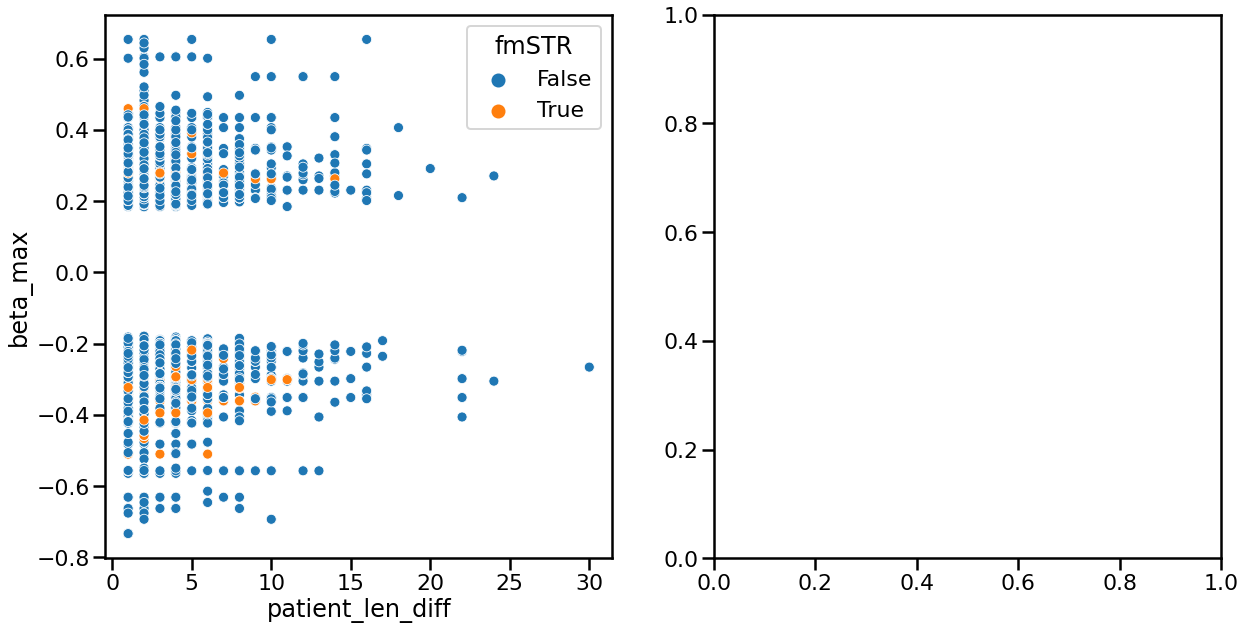

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

sns.scatterplot(
    data=df_in_estr_variable,
    x="patient_len_diff",
    y="beta_max",
    hue=df_in_estr_variable["CAVIAR_score"] > 0.3,
    s=100,
    ax=ax1
)
ax1.legend(title="fmSTR")

In [19]:
df_trusight_genes = pd.read_csv("/Users/maxverbiest/PhD/projects/genotype_strs/data/clinical/trusight_onco_genes.txt", sep="\t", header=None)
df_trusight_genes = df_trusight_genes.loc[:,[0,1]]
df_trusight_genes.columns = ["gene_id", "gene_name"]

df_trusight_genes["gene_id"] = df_trusight_genes.apply(lambda row: row.gene_id.split(".")[0], axis=1)
df_trusight_genes.head()

,gene_id,gene_name
0,ENSG00000097007,ABL1
1,ENSG00000143322,ABL2
2,ENSG00000115170,ACVR1
3,ENSG00000135503,ACVR1B
4,ENSG00000142208,AKT1


In [20]:
df_trusight_genes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523 entries, 0 to 522
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   gene_id    523 non-null    object
 1   gene_name  523 non-null    object
dtypes: object(2)
memory usage: 8.3+ KB


In [21]:
df_in_estr

,patient,tmp_id,allele_A_tumor,allele_B_tumor,allele_A_healthy,allele_B_healthy,period,ref,repeat_id,patient_len_diff
13,TCGA-AA-3489,chr1_1752910,10,10,10,10,3,9,1100327,0
459,TCGA-AA-3489,chr1_55058667,16,16,18,19,2,26,1142870,5
497,TCGA-AA-3489,chr1_66643729,7,7,7,7,2,7,1150529,0
646,TCGA-AA-3489,chr1_101021818,21,21,22,22,2,21,1166924,2
673,TCGA-AA-3489,chr1_109759146,16,18,15,17,2,19,1169780,2
...,...,...,...,...,...,...,...,...,...,...
2105797,TCGA-AG-3890,chr19_32606027,6,6,6,6,4,5,.,0
2106440,TCGA-AG-3890,chr5_176943071,4,4,4,4,4,4,.,0
2106453,TCGA-AG-3890,chr5_34042762,6,6,6,6,3,5,.,0
2106575,TCGA-AG-3890,chr6_26384925,3,3,3,3,4,3,.,0


In [29]:
pd.set_option("display.max_rows", 400)
pd.get_option("display.max_rows")

400

In [32]:
# df[df["gene_name"].isin(df_trusight_genes["gene_name"])].sort_values(by="CAVIAR_score", ascending=False).head(n=30)

# df_in_estr_variable.merge(df.loc[:, ["tmp_id", "gene_name", "beta_max", "CAVIAR_score"]], on="tmp_id", how="left").head()
df_in_estr_variable[df_in_estr_variable["gene_name"].isin(df_trusight_genes["gene_name"])].sort_values(by="patient_len_diff", ascending=False)

,patient,tmp_id,allele_A_tumor,allele_B_tumor,allele_A_healthy,allele_B_healthy,period,ref,repeat_id,patient_len_diff,gene_name,beta_max,CAVIAR_score
2778,TCGA-AA-3852,chr12_50086480,15,15,8,8,3,8,563623,14,SMARCD1,-0.240575,0.146725
2770,TCGA-AA-3679,chr12_50086480,14,14,8,8,3,8,563623,12,SMARCD1,-0.240575,0.146725
2766,TCGA-A6-5662,chr12_50086480,8,8,14,14,3,8,563623,12,SMARCD1,-0.240575,0.146725
944,TCGA-A6-6653,chr17_42207488,23,23,17,18,2,19,502972,11,STAT5B,0.184740,0.268980
2782,TCGA-AA-3860,chr12_50086480,10,10,15,15,3,8,563623,10,SMARCD1,-0.240575,0.146725
2774,TCGA-AA-3696,chr12_50086480,15,6,8,8,3,8,563623,9,SMARCD1,-0.240575,0.146725
2605,TCGA-AD-A5EK,chr13_48316720,16,16,16,25,2,32,1255628,9,RB1,0.246637,0.064131
3859,TCGA-AA-A00O,chr14_95116053,18,18,14,14,2,19,1483626,8,DICER1,-0.200855,0.163649
2642,TCGA-AA-3678,chr2_201350682,7,7,3,3,5,5,338908,8,CASP8,0.257185,0.002824
2601,TCGA-A6-5662,chr13_48316720,25,27,24,34,2,32,1255628,8,RB1,0.246637,0.064131


In [38]:
df_in_estr_variable[df_in_estr_variable["gene_name"].isin(df_trusight_genes["gene_name"])].groupby("gene_name").size()
df_in_estr_variable[df_in_estr_variable["CAVIAR_score"] > 0.3].groupby("gene_name").size().sort_values(ascending=False).head(n=50)

gene_name
PRRT1        27
RPL14        27
SNX2         26
ASPRV1       22
COL11A2      20
S100A16      17
RBCK1        16
DHRS1        16
USP33        15
C10orf129    11
RAB7A        10
HSD17B4       9
FBXW5         9
FAH           7
SMPD1         7
SLC35B1       6
GPD1          5
RPL29         5
ANKDD1A       4
RNPEP         3
PCDHGA9       3
MARS2         3
ZNF165        3
KAT8          2
TRAFD1        2
PLEKHF2       1
SIKE1         1
IGFL4         1
UBE2B         1
HSPBP1        1
VPS36         1
dtype: int64

In [41]:
df_in_estr_variable[df_in_estr_variable["gene_name"] == "PRRT1"].sort_values(by="patient_len_diff", ascending=False)

,patient,tmp_id,allele_A_tumor,allele_B_tumor,allele_A_healthy,allele_B_healthy,period,ref,repeat_id,patient_len_diff,gene_name,beta_max,CAVIAR_score
2536,TCGA-AA-3966,chr6_32155564,26,37,27,27,2,27,15145,11,PRRT1,-0.301305,0.597232
2534,TCGA-AA-3856,chr6_32155564,25,30,33,33,2,27,15145,11,PRRT1,-0.301305,0.597232
2533,TCGA-AA-3854,chr6_32155564,24,24,29,29,2,27,15145,10,PRRT1,-0.301305,0.597232
2529,TCGA-AA-3814,chr6_32155564,24,24,28,28,2,27,15145,8,PRRT1,-0.301305,0.597232
2538,TCGA-AA-A00O,chr6_32155564,28,28,25,33,2,27,15145,8,PRRT1,-0.301305,0.597232
2522,TCGA-AA-3672,chr6_32155564,26,31,23,26,2,27,15145,8,PRRT1,-0.301305,0.597232
2524,TCGA-AA-3678,chr6_32155564,18,18,18,26,2,27,15145,8,PRRT1,-0.301305,0.597232
2532,TCGA-AA-3852,chr6_32155564,28,28,24,26,2,27,15145,6,PRRT1,-0.301305,0.597232
2535,TCGA-AA-3949,chr6_32155564,23,23,26,26,2,27,15145,6,PRRT1,-0.301305,0.597232
2516,TCGA-AA-3712,chr6_32155564,29,29,26,26,2,27,15145,6,PRRT1,-0.301305,0.597232
